![heart](https://www.healtheuropa.eu/wp-content/uploads/2020/12/Cardiovascular-disease-related-to-Type-2-diabetes-can-be-vastly-reduced-696x378.jpg)

Graphs gives us better idea of data but when we need exact Number we use aggregation and groupby function to get more insight from data

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [2]:
#  For using autocomplete in kaggle notebooks
%config Completer.use_jedi = False

## About Data

`age` - Age of the patient

`sex` - Sex of the patient

`cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

`trtbps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

`thalachh` - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`caa` - Number of major vessels

`thall` - Thalium Stress Test result ~ (0,3)

`exng` - Exercise induced angina ~ 1 = Yes, 0 = No

`output` - Target variable

In [3]:
df = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [4]:
df 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1    54.455446
0    45.544554
Name: output, dtype: float64


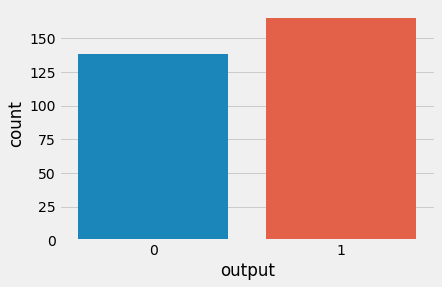

In [7]:
sns.countplot(df.output)
print(df.output.value_counts()/len(df)*100)

* Data is almost abalance

<AxesSubplot:xlabel='age', ylabel='Count'>

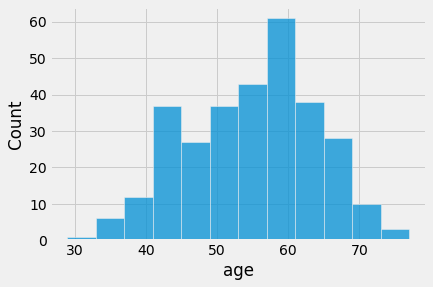

In [8]:
sns.histplot(df.age)

1    68.316832
0    31.683168
Name: sex, dtype: float64


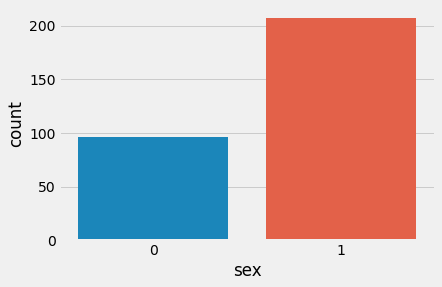

In [9]:
sns.countplot(df.sex)
print(df.sex.value_counts()/len(df)*100)

* 0 are females
* 1 is Male


It might be happen our model is more bias towards Males because it has more data

<AxesSubplot:xlabel='thalachh', ylabel='Count'>

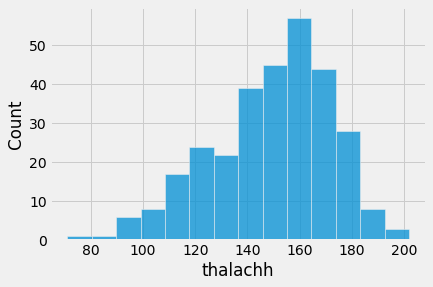

In [10]:
sns.histplot(df.thalachh)

* thalachh = maximum heart rate achieved

<AxesSubplot:xlabel='chol', ylabel='Count'>

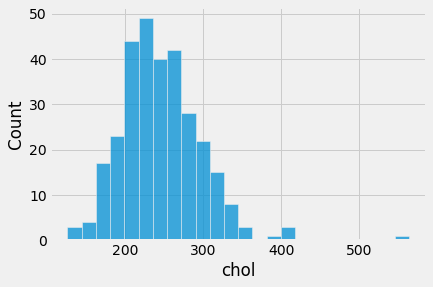

In [11]:
sns.histplot(df.chol)

* chol : cholestoral in mg/dl fetched via BMI sensor


In [12]:
print('Before droping we have dataset of size', df.shape)
df.drop(index=df[(df.chol > 369.75) | (df.chol < 115.75)].index, inplace=True)
print('After droping we have dataset of size', df.shape)

Before droping we have dataset of size (303, 14)
After droping we have dataset of size (298, 14)


<AxesSubplot:xlabel='cp', ylabel='count'>

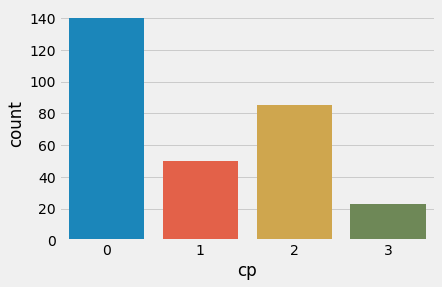

In [13]:
sns.countplot(df.cp)

cp : Chest Pain type chest pain type

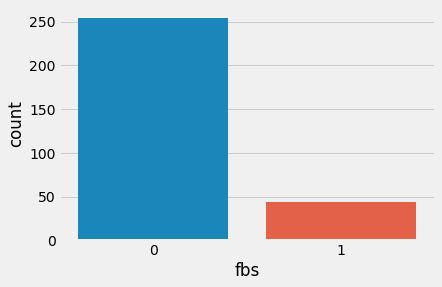

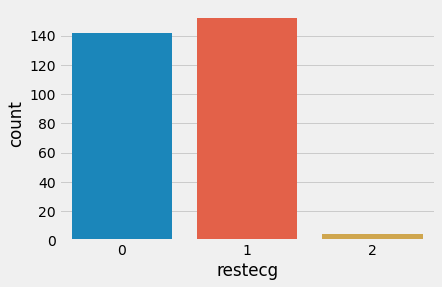

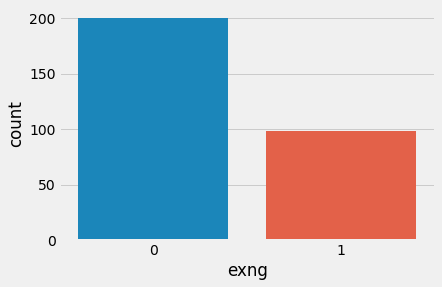

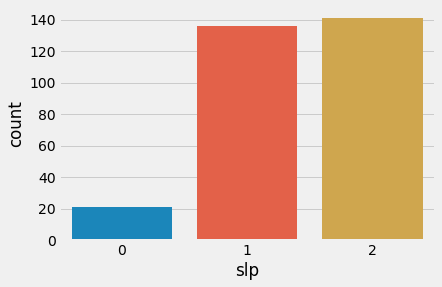

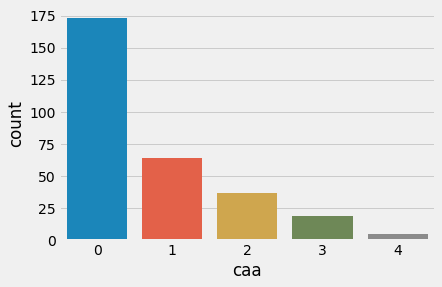

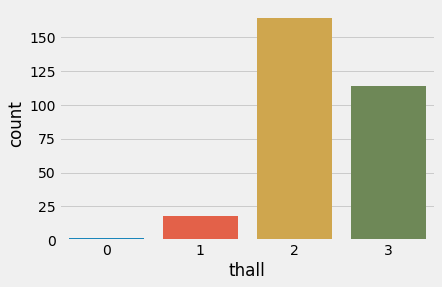

In [14]:
columns = ['fbs','restecg','exng','slp','caa','thall']
for col in columns:
    sns.countplot(df[col])
    plt.show()

# Multivariant analysis

## Age

`Pandas cut()` function is used to separate the array elements into different bins . The cut function is mainly used to perform statistical analysis on scalar data. 

`cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates=”raise”,)`

Parameters:

x: The input array to be binned. Must be 1-dimensional.

bins: defines the bin edges for the segmentation.

In [15]:
# Create bins for age and group them
# Aggregate by sum()
df.groupby(pd.cut(df.age,[25,35,45,55,65,75,85])).sum().sort_values('output', ascending=False)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,,,,,,,,,,,,,,
"(45, 55]",4504,62,89,11366,21569,14,51,13324,28,78.1,130,50,204,55
"(35, 45]",2398,41,65,7062,13243,3,36,9283,13,38.8,86,22,125,43
"(55, 65]",6824,79,96,15482,28249,21,53,16426,44,148.6,148,104,271,43
"(65, 75]",2044,19,31,4156,7414,6,14,4044,10,35.2,38,36,68,15
"(25, 35]",237,5,6,872,1451,0,4,1210,2,3.7,13,0,16,5
"(75, 85]",153,1,2,265,501,0,2,278,1,1.1,3,3,4,1


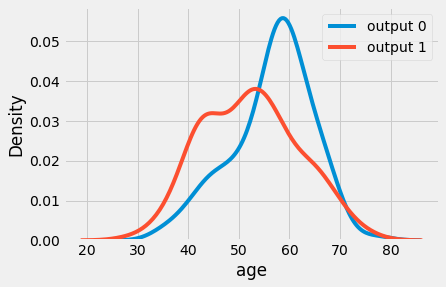

In [16]:
sns.kdeplot(df.loc[df['output'] == 0, 'age'], label = 'output 0')
sns.kdeplot(df.loc[df['output'] == 1, 'age'], label = 'output 1')
plt.legend()

In [17]:
# Aggregate by Count()
df.groupby(pd.cut(df.age,[25,35,45,55,65,75,85])).count().sort_values('output', ascending=False)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,,,,,,,,,,,,,,
"(55, 65]",114,114,114,114,114,114,114,114,114,114,114,114,114,114
"(45, 55]",88,88,88,88,88,88,88,88,88,88,88,88,88,88
"(35, 45]",57,57,57,57,57,57,57,57,57,57,57,57,57,57
"(65, 75]",30,30,30,30,30,30,30,30,30,30,30,30,30,30
"(25, 35]",7,7,7,7,7,7,7,7,7,7,7,7,7,7
"(75, 85]",2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [18]:
df_age = df.groupby(pd.cut(df.age,[25,35,45,55,65,75,85])).sum().sort_values('output', ascending=False)
df_age['total_count'] = df.groupby(pd.cut(df.age,[25,35,45,55,65,75,85])).count().sort_values('output', ascending=False)['output']
df_age['percentage'] = df_age['output'] / df_age['total_count'] * 100
df_age = df_age[['output','total_count','percentage']]
df_age

,output,total_count,percentage
age,,,
"(45, 55]",55,88,62.500000
"(35, 45]",43,57,75.438596
"(55, 65]",43,114,37.719298
"(65, 75]",15,30,50.000000
"(25, 35]",5,7,71.428571
"(75, 85]",1,2,50.000000


<AxesSubplot:xlabel='age', ylabel='Count'>

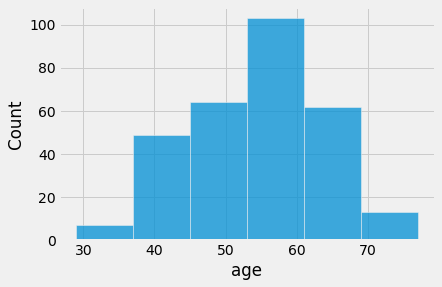

In [19]:
sns.histplot(df.age,bins=6)

By above observation we don't able to say 35 - 65 have more chances of heart attacks because,

We have very less data for saying 25-35 and 65-85 has less heart attacks

So, we can't direct jump on colnclusion, we need more data

# Sex

## Male Female who is more likely to have heart problem ?

* 0 : Female
* 1 : Male

In [20]:
df.sex.value_counts()/len(df)*100

1    69.463087
0    30.536913
Name: sex, dtype: float64

We have inbalance dataset

In [21]:
df.groupby('sex').sum()

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
sex,,,,,,,,,,,,,
0,5032,96,12097,22894,11,55,13730,21,74.6,131,47,191,69
1,11128,193,27106,49533,33,105,30835,77,230.9,287,168,497,93


By sum we can easily see Male get more heart attacks But...

In [22]:
df.groupby('sex').mean()

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
sex,,,,,,,,,,,,,
0,55.296703,1.054945,132.934066,251.582418,0.120879,0.604396,150.879121,0.230769,0.819780,1.439560,0.516484,2.098901,0.758242
1,53.758454,0.932367,130.946860,239.289855,0.159420,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


Mean show completely different picture here, they show female gets more heart attack, HOW??

because male has more data points mean value decrese


and female has less data points their mean value increase

Imbalance dataset

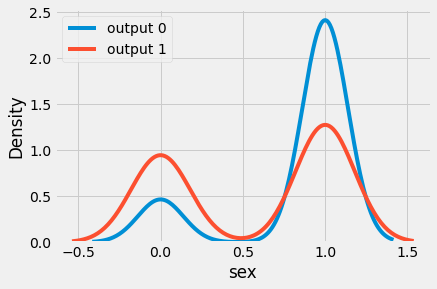

In [23]:
sns.kdeplot(df.loc[df['output'] == 0, 'sex'], label = 'output 0')
sns.kdeplot(df.loc[df['output'] == 1, 'sex'], label = 'output 1')
plt.legend()

* We can say Female has more probability of attacks by seeing kdeplot

In [24]:
# copy dataframe to another varible
df_se_ag = df.copy()

# create seperate variable for both sex
df_se_ag['female'] = np.where(df_se_ag.sex == 0,1,0)
df_se_ag['male'] = np.where(df_se_ag.sex == 1,1,0)

# seperate output variable base on sex
df_se_ag['out_female'] = np.where(df_se_ag.sex == 0,df_se_ag.output,0)
df_se_ag['out_male'] = np.where(df_se_ag.sex == 1,df_se_ag.output,0)

because values are between 1 and 0 when we add them we only get count of 1

In [25]:
# apply groupby function by age
# take only necessary columns
ma_fe_df = df_se_ag.groupby(pd.cut(df_se_ag.age,[25,35,45,55,65,75,85])).sum()[['female','male','out_female','out_male']]
ma_fe_df

,female,male,out_female,out_male
age,,,,
"(25, 35]",2,5,2,3
"(35, 45]",16,41,15,28
"(45, 55]",26,62,23,32
"(55, 65]",35,79,18,25
"(65, 75]",11,19,10,5
"(75, 85]",1,1,1,0


`out_female` and `out_male` feature is show total number of heart attack paitent 

In [26]:
# find out percentage 
ma_fe_df['per_female'] = ma_fe_df['out_female'] / ma_fe_df['female'] *100
ma_fe_df['per_male'] = ma_fe_df['out_male'] / ma_fe_df['male']*100

ma_fe_df

,female,male,out_female,out_male,per_female,per_male
age,,,,,,
"(25, 35]",2,5,2,3,100.000000,60.000000
"(35, 45]",16,41,15,28,93.750000,68.292683
"(45, 55]",26,62,23,32,88.461538,51.612903
"(55, 65]",35,79,18,25,51.428571,31.645570
"(65, 75]",11,19,10,5,90.909091,26.315789
"(75, 85]",1,1,1,0,100.000000,0.000000


Again we confirm our previous statement by seeing agewise male female

Female has more probably of heart attacks as compare to Male

# Cholestrol

In [27]:
df.groupby('chol').sum()

,age,sex,cp,trtbps,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
chol,,,,,,,,,,,,,
126,57,1,2,150,1,1,173,0,0.2,2,1,3,1
131,57,1,0,130,0,1,115,1,1.2,1,1,3,0
141,44,0,2,108,0,1,175,0,0.6,1,0,2,1
149,120,1,2,230,0,1,251,0,2.4,3,3,4,1
157,41,1,1,120,0,1,182,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,43,0,0,132,1,0,136,1,3.0,1,0,3,0
342,55,0,1,132,0,1,166,0,1.2,2,0,2,1
353,55,1,0,132,0,1,132,1,1.2,1,1,3,0


** At first glance anybody can say cholestrol above 192 is more chances of heart diseases **


There is BIG BUT..

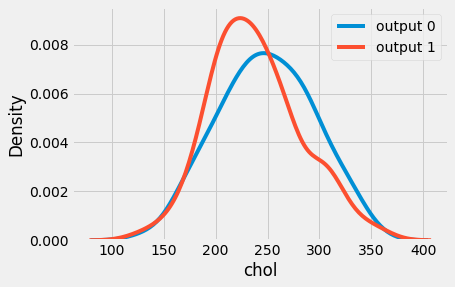

In [28]:
sns.kdeplot(df.loc[df['output'] == 0, 'chol'], label = 'output 0')
sns.kdeplot(df.loc[df['output'] == 1, 'chol'], label = 'output 1')
plt.legend()

In [29]:
df_chol = df.copy()
df_chol['c_grp'] = pd.cut(df['chol'],14)
df_chol = df_chol.groupby('c_grp').sum()
df_chol['chol_count'] = df.groupby(pd.cut(df['chol'],14)).count()['chol']
df_chol['percent'] = df_chol['output'] / df_chol['chol_count']*100
df_chol

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,chol_count,percent
c_grp,,,,,,,,,,,,,,,,
"(125.766, 142.714]",158,2,4,388,398,1,3,463,1,2.0,4,2,8,2,3,66.666667
"(142.714, 159.429]",161,2,3,350,455,0,2,433,0,2.4,5,3,6,2,3,66.666667
"(159.429, 176.143]",606,10,9,1595,2041,1,7,1682,4,20.4,14,14,26,5,12,41.666667
"(176.143, 192.857]",810,13,17,2060,2933,1,9,2352,5,18.6,23,8,35,9,16,56.250000
"(192.857, 209.571]",2028,26,35,4989,7854,8,28,6011,13,30.7,58,16,87,26,39,66.666667
"(209.571, 226.286]",2117,28,47,5200,8718,4,23,6003,9,41.0,59,28,88,27,40,67.500000
"(226.286, 243.0]",2467,35,56,5882,10566,7,27,6931,13,45.3,58,28,109,25,45,55.555556
"(243.0, 259.714]",2027,28,32,4865,9288,8,12,5669,12,35.9,52,35,84,18,37,48.648649
"(259.714, 276.429]",1956,22,33,4597,9374,2,16,4950,14,32.0,48,17,83,19,35,54.285714


we can clearly see here cholestrol is not a good factor in Heart Disease

Because the guy who has 125 cholestrol has 66% probability and guy has more than 340 also same probability

### How many times we write same code lets make function for it

also important to write again and again to understand it

In [30]:
def kdplot(col):
    '''
    Return
    ----------
    plot kdeplot for output variable `col`
    '''
    sns.kdeplot(df.loc[df['output'] == 0, col], label = 'output 0')
    sns.kdeplot(df.loc[df['output'] == 1, col], label = 'output 1')
    plt.legend()
    plt.show

In [31]:
def show_per_cat(df,col):
    '''
    Function for category
    
    Return
    --------
    df_temp(Dataframe):
        Contain count of attacks , total points and percentage of attack
    '''
    df_temp = df.copy()
    df_temp = df_temp.groupby(col).sum()
    df_temp['grp_count'] = df.groupby(col).count()['output']
    df_temp['percent'] = df_temp['output'] / df_temp['grp_count']*100
    
    return df_temp[['output','grp_count','percent']]

In [32]:
show_per_cat(df,'exng')

,output,grp_count,percent
exng,,,
0,139,200,69.500000
1,23,98,23.469388


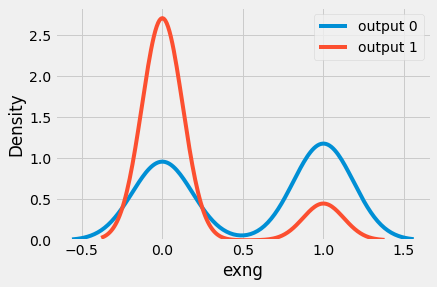

In [33]:
kdplot('exng')

exercise induced angina (1 = yes; 0 = no)


0 is more probable to heart disease

# Chest Pain

In [34]:
show_per_cat(df,'cp')

,output,grp_count,percent
cp,,,
0,38,140,27.142857
1,41,50,82.000000
2,67,85,78.823529
3,16,23,69.565217


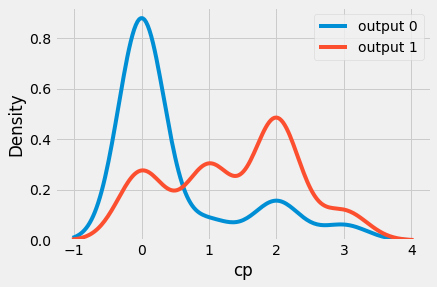

In [35]:
kdplot('cp')

Definitely chest pain is bad sign for heart

In [36]:
def show_per_cont(df,col,quant=5):
    '''
    Function for continuous features
    
    quant (int):
        It divide number of unique values in that feature and create those amount of bins
        we can change that if feature has many unique features 
    
    Return
    --------
    df_temp(Dataframe):
        Contain count of attacks , total points and percentage of attack
    '''
    df_chol = df.copy()
    df_chol = df_chol.groupby(pd.cut(df[col],int(df[col].nunique()/quant))).sum()
    df_chol['grp_count'] = df.groupby(pd.cut(df[col],int(df[col].nunique()/quant))).count()['output']
    df_chol['percent'] = df_chol['output'] / df_chol['grp_count']*100
    
    return df_chol[['output','grp_count','percent']]

In [37]:
show_per_cont(df,'trtbps')

,output,grp_count,percent
trtbps,,,
"(93.894, 105.778]",11,13,84.615385
"(105.778, 117.556]",20,39,51.282051
"(117.556, 129.333]",45,82,54.878049
"(129.333, 141.111]",59,100,59.000000
"(141.111, 152.889]",16,35,45.714286
"(152.889, 164.667]",7,15,46.666667
"(164.667, 176.444]",2,7,28.571429
"(176.444, 188.222]",2,5,40.000000
"(188.222, 200.0]",0,2,0.000000


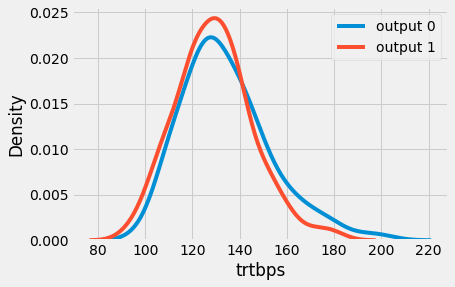

In [38]:
kdplot('trtbps')

There is no usefulness insight from trtbps means resting blood pressure

In [39]:
show_per_cat(df,'fbs')

,output,grp_count,percent
fbs,,,
0,140,254,55.11811
1,22,44,50.00000


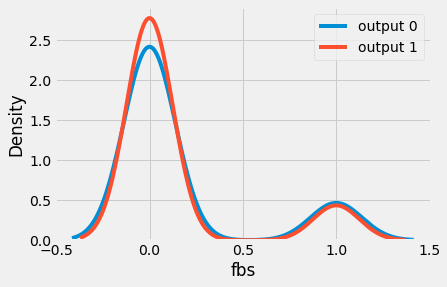

In [40]:
kdplot('fbs')

In [41]:
show_per_cat(df,'restecg')

,output,grp_count,percent
restecg,,,
0,65,142,45.774648
1,96,152,63.157895
2,1,4,25.000000


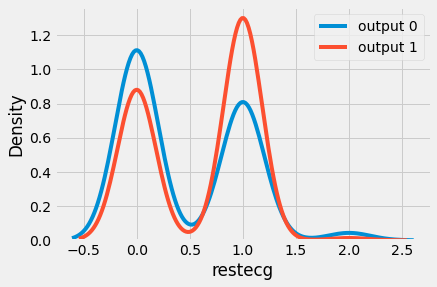

In [42]:
kdplot('restecg')

Not any impactful insight

In [43]:
show_per_cat(df,'thall')

,output,grp_count,percent
thall,,,
0,1,2,50.000000
1,6,18,33.333333
2,128,164,78.048780
3,27,114,23.684211


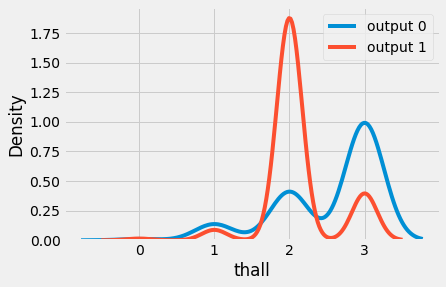

In [44]:
kdplot('thall')

More thall less probability to heart diseases

# Modeling

In [45]:
# Convert features data type to category
cat_col = ['sex','cp','fbs','restecg', 'exng', 'slp', 'caa', 'thall']
df[cat_col] = df[cat_col].astype('category')

In [46]:
# Performing One-Hot-Encoding
df_process = pd.get_dummies(df, columns=cat_col, drop_first=True)

In [47]:
df_process

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
301,57,130,131,115,1.2,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,1


Now we have 23 features

In [48]:
# Seperate output feature
X = df_process.drop(columns='output')
y = df_process.output

In [49]:
# Standardise data to improve accuracy of Linear models
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
df_scale = scaler.transform(X)

In [50]:
# Dividing data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((238, 22), (60, 22), (238,), (60,))

For training we have 238 data points and for testing we have 60

Data is imbalance we cannot trust ACCURACY we use F1 score

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']

In [53]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.79      0.85      0.82        27
     class 1       0.87      0.82      0.84        33

    accuracy                           0.83        60
   macro avg       0.83      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60



In [54]:
sv = SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.61      0.52      0.56        27
     class 1       0.65      0.73      0.69        33

    accuracy                           0.63        60
   macro avg       0.63      0.62      0.62        60
weighted avg       0.63      0.63      0.63        60



In [55]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.59      0.81      0.69        27
     class 1       0.78      0.55      0.64        33

    accuracy                           0.67        60
   macro avg       0.69      0.68      0.67        60
weighted avg       0.70      0.67      0.66        60



In [56]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.77      0.74      0.75        27
     class 1       0.79      0.82      0.81        33

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



In [57]:
gb = GradientBoostingClassifier(n_estimators=20)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.67      0.68        27
     class 1       0.74      0.76      0.75        33

    accuracy                           0.72        60
   macro avg       0.71      0.71      0.71        60
weighted avg       0.72      0.72      0.72        60



# Hyperparameter Tunning

In [58]:
lr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.850151 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [59]:
lr = LogisticRegression(C=10, penalty='l2',solver='newton-cg')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.79      0.85      0.82        27
     class 1       0.87      0.82      0.84        33

    accuracy                           0.83        60
   macro avg       0.83      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60



In [60]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 5, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.718117 using {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}


In [61]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.794406 using {'max_features': 'sqrt', 'n_estimators': 100}


In [62]:
# model = GradientBoostingClassifier()
# n_estimators = [10, 30, 70, 100, 1000]
# learning_rate = [0.001, 0.01, 0.1]
# subsample = [0.5, 0.7, 1.0]
# max_depth = [2, 4, 6, 8, 10]
# # define grid search
# grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# >>>> Best: 0.827759 using {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000, 'subsample': 0.5}

In [63]:
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=1000, subsample=0.5)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.78      0.78      0.78        27
     class 1       0.82      0.82      0.82        33

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [64]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import xgboost

In [65]:
#  It takes half hour to run
# model = xgboost.XGBClassifier()
# params = {"learning_rate"    : [0.05, 0.10, 0.15],
#          "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#           "min_child_weight" : [ 1, 3, 5, 7 ],
#           "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#           "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

# cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
# grid_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0,n_iter=20)
# grid_result = grid_search.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# # >>> Best: 0.813143 using {'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.3}

In [66]:
xgbt = xgboost.XGBClassifier(min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3)
xgbt.fit(X_train,y_train)
y_pred = xgbt.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

[11:19:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

     class 0       0.82      0.85      0.84        27
     class 1       0.88      0.85      0.86        33

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [67]:
param = {'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.3}
num_round = 20

In [68]:
txgb = xgboost.XGBClassifier(min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3)
dtrain = xgb.DMatrix(df.drop('output',axis=1), label=df.output, enable_categorical=True)
bst = xgb.train(param, dtrain, num_round)
# txgb.fit(dtrain)
# y_pred = txgb.predict(X_test)
# print(classification_report(y_test, y_pred, target_names=target_names))

In [69]:
# For features importance
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=1000, subsample=0.5)
gb.fit(df.drop('output',axis=1),df.output)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=1000,
                           subsample=0.5)

In [70]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


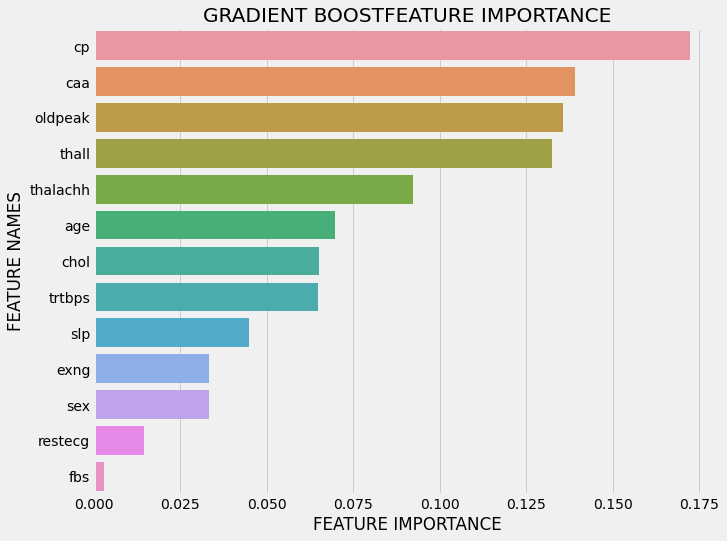

In [71]:
plot_feature_importance(gb.feature_importances_,df.drop('output',axis=1).columns,'GRADIENT BOOST')

We see here Chest pain has maximium contribution to predictiong more chances of heart attack.

In [72]:
# we plot feature importance
pd.Series(gb.feature_importances_,index=df.drop('output',axis=1).columns).sort_values(ascending=False)

cp          0.172411
caa         0.139169
oldpeak     0.135592
thall       0.132392
thalachh    0.092157
age         0.069711
chol        0.065149
trtbps      0.064721
slp         0.044749
exng        0.033268
sex         0.033179
restecg     0.014580
fbs         0.002922
dtype: float64

# I hope this is HELPFUL❤️ !!!

## What next
* We can create webapp that give you advice for healthy heart from this dataset using `Flask` or `Stramlit`  